In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
from glob import glob
import cartopy.crs as ccrs

%matplotlib inline

In [3]:
ds = xr.open_dataset(os.path.join('test.clm2.h0.0001-02.nc'))

/Users/leo/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:389: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/leo/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:408: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


# internal snow temperature (CLM)

In [4]:
nom = ds.variables["TSNO_MUL_MASS"].values
denom = ds.variables["SNOWICE"].values + ds.variables["SNOWLIQ"].values

internal_temp = nom / denom
internal_temp = np.ma.masked_invalid(internal_temp)
internal_temp.max(), internal_temp.min()

#internal_temp = np.where(mask_snow, ds.variables["TSNO_MUL_MASS"] / (ds.variables["H2OSNO"], 0.)

/Users/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


(273.15001146260812, 214.63220000000001)

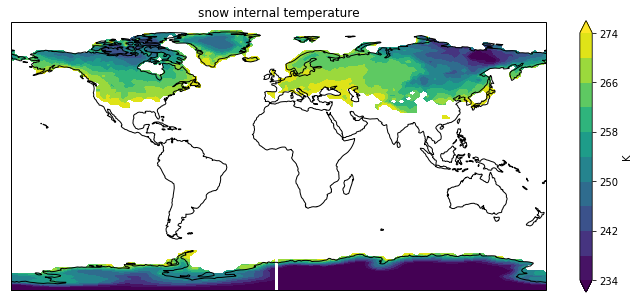

In [5]:
myproj = ccrs.PlateCarree()
lon2d, lat2d = np.meshgrid(ds['lon'], ds['lat'])
fig, ax = plt.subplots(1, figsize=(12,5),subplot_kw={'projection': myproj})

cf = ax.contourf(lon2d, lat2d, internal_temp[0],
        transform = myproj, levels=np.linspace(234,274,11),
        extend='both')
cb = fig.colorbar(cf,ax=ax,label='K')

ax.coastlines()
ax.set_title('snow internal temperature')
ax.set_global()
fig.savefig('python_sit.png',dpi=300)

# derive internal snow temperature from 3D snow fields

In [9]:
mass_ice = ds.variables["SNO_ICE"].values 
mass_liq = ds.variables["SNO_LIQH2O"].values
exist = ds.variables["SNO_EXISTENCE"].values
temp = ds.variables["SNO_T"].values
tfrz = 273.15
mass = mas

mass = np.ma.masked_invalid(mass)
exist = np.ma.masked_invalid(exist)
temp = np.ma.masked_invalid(temp)

nom = np.sum(mass_ice * exist * temp + mass_liq * exist * tfrz, axis=1)
denom = np.sum(mass * exist, axis=1)

internal_temp2 = nom/denom
#internal_temp2 = np.ma.masked_invalid(internal_temp2)


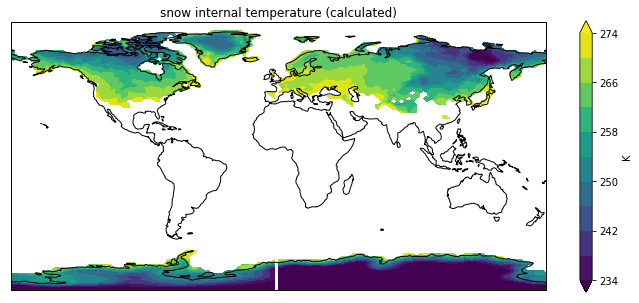

In [7]:
myproj = ccrs.PlateCarree()
lon2d, lat2d = np.meshgrid(ds['lon'], ds['lat'])
fig, ax = plt.subplots(1, figsize=(12,5),subplot_kw={'projection': myproj})

cf = ax.contourf(lon2d, lat2d, internal_temp2[0],
        transform = myproj, levels=np.linspace(234,274,11),
        extend='both')
cb = fig.colorbar(cf,ax=ax,label='K')

ax.coastlines()
ax.set_title('snow internal temperature (calculated)')
ax.set_global()
fig.savefig('python_sit2.png',dpi=300)

# Difference map 

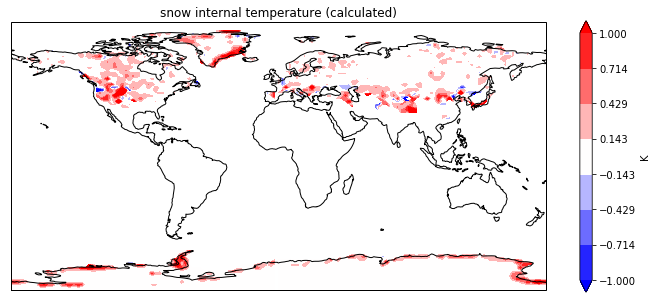

In [8]:
myproj = ccrs.PlateCarree()
lon2d, lat2d = np.meshgrid(ds['lon'], ds['lat'])
fig, ax = plt.subplots(1, figsize=(12,5),subplot_kw={'projection': myproj})

cf = ax.contourf(lon2d, lat2d, internal_temp[0]-internal_temp2[0],
        transform = myproj, levels=np.linspace(-1, 1 ,8),
        cmap='bwr',
        extend='both')
cb = fig.colorbar(cf,ax=ax,label='K')

ax.coastlines()
ax.set_title('snow internal temperature (calculated)')
ax.set_global()
fig.savefig('python_diff.png',dpi=300)